In [1]:
import numpy as np
import math

def rotate_image_inverse_linear_interpolation(image, angle_degrees):
    # 이미지 높이, 너비
    sizex, sizey = image.shape
    # 결과 이미지 배열
    int_image=np.zeros((sizex,sizey),dtype="uint8")

    # 회전 각도 라디안 단위로 변환 (counterclockwise회전)
    theta = math.radians(angle_degrees)
    cos_theta = math.cos(theta)
    sin_theta = math.sin(theta)

    R_inv = np.array([
        [cos_theta, sin_theta],
        [-sin_theta, cos_theta]])
    
    #출력이미지 각 픽셀값에 대해 계산
    for x in range(sizex):
        for y in range(sizey):
            # 중심 좌표(중심을 원점으로)
            x_shift = x - sizex // 2
            y_shift = y - sizey // 2

            # 역회전 행렬 적용
            row, col = np.dot(R_inv, np.array([x_shift, y_shift]))

            # 다시 중심 좌표계로 복원 
            row += sizex // 2
            col += sizey // 2
            
            # 보간을 위한 주변 정수 좌표
            irow = int(row)
            icol = int(col)

            if 0 <= irow < sizex and 0 <= irow + 1 < sizex and 0 <= icol < sizey and 0 <= icol+1 < sizey:
                a = row - irow
                b = col - icol

                # bilinear interpolation
                int_image[x, y] = int((image[irow, icol] * (1 - a) * (1 - b) +
                         image[irow, icol+1] * a * (1 - b) +
                         image[irow+1, icol] * (1 - a) * b +
                         image[irow+1, icol+1] * a * b).astype("uint8"))

            else:
                int_image[x, y] = 0  # 이미지 밖은 0

    return int_image


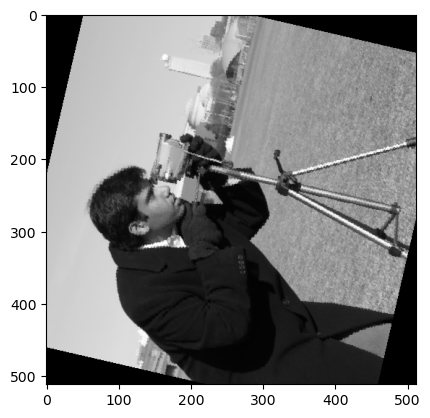

In [2]:
from skimage import data
import matplotlib.pyplot as plt
cam = data.camera()
rotated = rotate_image_inverse_linear_interpolation(cam, 77)
plt.imshow(rotated, cmap="gray")